([<matplotlib.axis.YTick at 0x7fba28ba3b80>,
 [Text(0, -7.5, '−7.5'),
  Text(0, -7.0, '−7.0'),
  Text(0, -6.5, '−6.5'),
  Text(0, -6.0, '−6.0'),
  Text(0, -5.5, '−5.5'),
  Text(0, -5.0, '−5.0'),
  Text(0, -4.5, '−4.5'),
  Text(0, -4.0, '−4.0'),
  Text(0, -3.5, '−3.5'),
  Text(0, -3.0, '−3.0'),
  Text(0, -2.5, '−2.5'),
  Text(0, -2.0, '−2.0'),
  Text(0, -1.5, '−1.5'),
  Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0')])

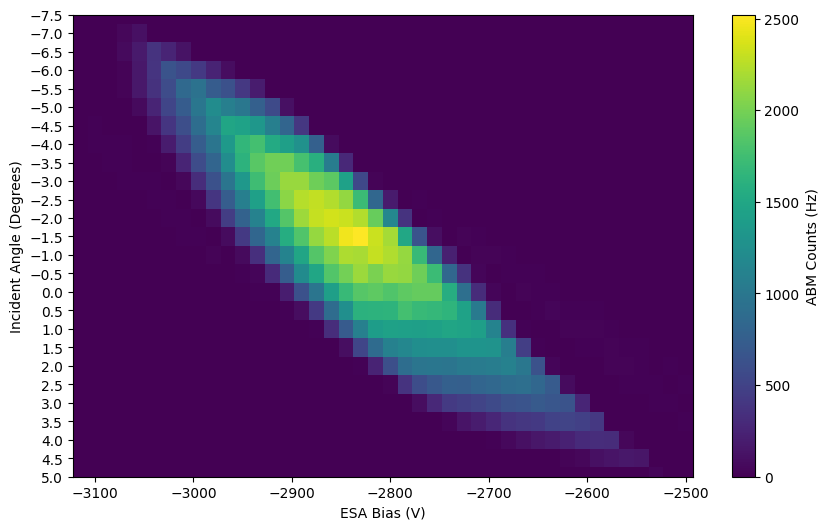

In [22]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

# Specify the file numbers of interest
file_numbers = np.arange(4, 30)

# Initialize empty lists to store COIN Rate data and angles
coin_data = []
angles = []

# Read the number of energy steps from one of the files
energy_steps = len(pd.read_csv(f'ESA HVPS logs/SWEEP_ESA_2024.03.30_4.csv', skiprows=1)['COIN Rate'])

# Loop through the range of file numbers
for file_number in file_numbers:
    # Construct the filename
    file_path = f'ESA HVPS logs/SWEEP_ESA_2024.03.30_{file_number}.csv'

    # Read CSV file
    df = pd.read_csv(file_path, skiprows=1)
    
    # Extract angle from file name
    angle_str = file_path.split('_')[-1].split('.')[0]
    angle = float(angle_str)
    angles.append(angle)
    
    # Extract COIN Rate data (excluding first and last rows)
    coin_rate = df.iloc[1:-1]['COIN Rate'].values
    coin_data.append(coin_rate)

# Create a 2D array to store COIN Rate data
coin_array = np.array(coin_data)

# Define the angle values according to the given range
angles = np.arange(-7.5, 5.5, 0.5)

# Create a grid of x and y values
x = np.linspace(angles[0], angles[-1], num=len(angles))
y = np.arange(-2500, -3130, -15)
X, Y = np.meshgrid(y, x)  # Swapped X and Y

# Plot the color plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.pcolormesh(X, Y, coin_array, cmap=plt.cm.viridis)  # Swapped X and Y
plt.colorbar(label='ABM Counts (Hz)')
plt.xlabel('ESA Bias (V)')  # Swapped xlabel and ylabel
plt.ylabel('Incident Angle (Degrees)')  # Swapped xlabel and ylabel
 # Updated title

# Adjust y-axis limits to match the range of the data
plt.ylim(angles[-1], angles[0])

# Change the y-axis tick marks
plt.yticks(angles)

TypeError: Dimensions of C (26, 42) should be one smaller than X(26) and Y(42) while using shading='flat' see help(pcolormesh)

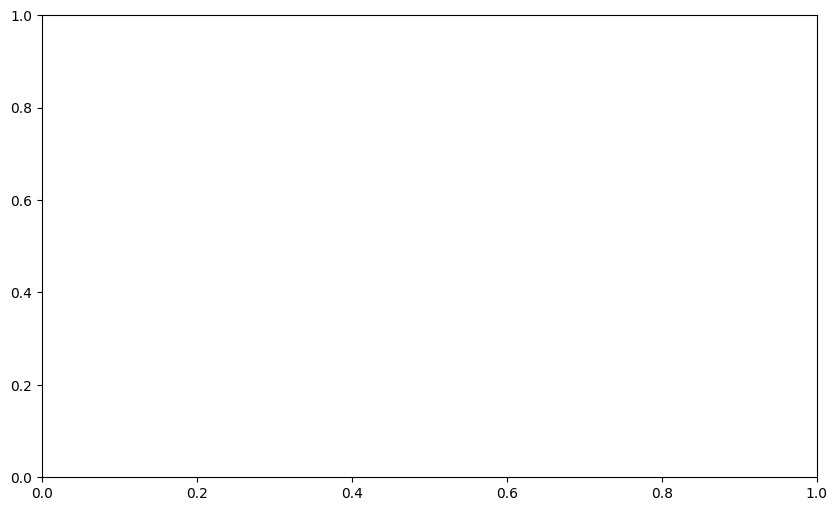

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read coin data
file_numbers = np.arange(4, 30)
coin_data = []
angles = []

for file_number in file_numbers:
    file_path = f'ESA HVPS logs/SWEEP_ESA_2024.03.30_{file_number}.csv'
    df = pd.read_csv(file_path, skiprows=1)
    angle = float(file_path.split('_')[-1].split('.')[0])
    angles.append(angle)
    coin_rate = df.iloc[1:-1]['COIN Rate'].values
    coin_data.append(coin_rate)

coin_array = np.array(coin_data)
max_count = np.max(coin_array)
normalized_coin_array = coin_array / max_count
angles = np.arange(-7.5, 5.5, 0.5)
x = np.linspace(angles[0], angles[-1], num=len(angles))
y = np.arange(-2500, -3130, -15)
X, Y = np.meshgrid(x, y)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
heatmap = ax.pcolormesh(X, Y, normalized_coin_array, cmap='jet')
plt.colorbar(heatmap, label='Normalized ABM Counts')
plt.xlabel('ESA Bias (V)')
plt.ylabel('Incident Angle (Degrees)')
plt.ylim(angles[-1], angles[0])
plt.yticks(angles)
plt.title('Coin Data')

# Read proton data
df46 = pd.read_csv('Mar7_20keV_PB.csv') 
d2f = df46.to_numpy()  # Convert DataFrame to NumPy array
BINS2 = [24, 29]
E_2 = []
alpha_2 = []

for i, value in enumerate(d2f[:, 4]):  # Assuming the fourth column contains the relevant data
    try:
        numeric_Y = float(value)
        if numeric_Y < 35:
            if d2f[i, 0] == d2f[i - 1, 0] and d2f[i, 0] != d2f[i - 2, 0]:
                E_2.append(d2f[i - 1, 5])
                alpha_2.append(d2f[i - 1, 4])                  
                    
    except ValueError:
        pass  

alpha_2 = np.array(alpha_2).astype(float)
E_2 = np.array(E_2).astype(float)

# Create a 2D histogram
counts, xedges, yedges = np.histogram2d(E_2, alpha_2, bins=BINS2)

# Find the maximum count
max_count = np.max(counts)

# Normalize the counts
normalized_counts = counts / max_count

# Create X and Y mesh grids for contour plot
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# Overlay wireframe contour plot
wireframe = ax.contour(X, Y, normalized_counts.T, levels=10, colors='k', linewidths=0.5, alpha=0.5)

plt.show()


In [9]:
df46

,Ion N,X,Y,Z,Elv,KE
0,1,0.0000,288.448,55.7124,-8.00000,17000.0
1,1,48.0739,278.000,55.3682,-17.25130,19312.7
2,2,0.0000,285.042,47.7051,-8.00000,17150.0
3,2,32.1987,279.000,48.0231,-14.06350,19371.7
4,3,0.0000,280.299,48.5438,-8.00000,17300.0
...,...,...,...,...,...,...
408241,199998,164.0330,279.000,52.8110,-8.80363,22675.3
408242,199999,0.0000,291.081,54.5895,8.00000,17000.0
408243,199999,82.0000,291.482,54.3880,-8.16390,16911.2
408244,200000,0.0000,282.821,54.9181,8.00000,17150.0


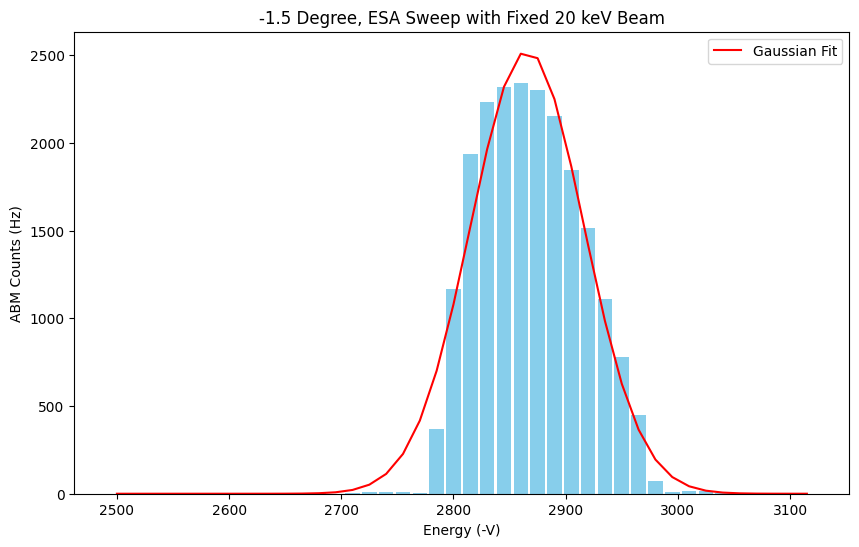

Amplitude = 2524.9 ± 69.2 Hz
Mean (-V) = 2865.8 ± 1.6
Mean = 21175.1 ± 11.8 eV
FWHM = 878.1 ± 27.8 eV
Energy Resolution = 4.39 %


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

# Specify the file number of interest
file_number = 15

# Read the CSV file
file_path = f'ESA HVPS logs/SWEEP_ESA_2024.03.30_{file_number}.csv'
df = pd.read_csv(file_path, skiprows=1)

# Extract energy steps and COIN Rate data
energy_steps = np.arange(2500, 3130, 15)
coin_rates = df.iloc[1:-1]['COIN Rate'].values

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(energy_steps, coin_rates, width=13, color='skyblue')  # Adjust width as needed

# Fit Gaussian curve
popt, pcov = curve_fit(gaussian, energy_steps, coin_rates, p0=[max(coin_rates), np.mean(energy_steps), np.std(energy_steps)])
plt.plot(energy_steps, gaussian(energy_steps, *popt), color='red', linestyle='-', label='Gaussian Fit')

plt.xlabel('Energy (-V)')
plt.ylabel('ABM Counts (Hz)')
plt.title('-1.5 Degree, ESA Sweep with Fixed 20 keV Beam')
plt.legend()
plt.grid(False)  # Remove grid
plt.show()

print('Amplitude =',round(popt[0],1), '±', round((pcov[0,0])**0.5,1),'Hz')
print('Mean (-V) =', round(popt[1],1), '±', round(pcov[1,1]**0.5,1))
print('Mean =', round(popt[1]*7.389,1), '±', round(pcov[1,1]**0.5*7.389,1),'eV')
print('FWHM =', round(popt[2]*2.355*7.389,1), '±', round((pcov[2,2]**0.5)*2.355*7.389,1),'eV')
print('Energy Resolution =', round(popt[2]*2.355*7.389/20000*100,2),'%')